In [ ]:
##线性回归实验分析

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,1) 
y = 4 + 3 * X + np.random.randn(100,1) 

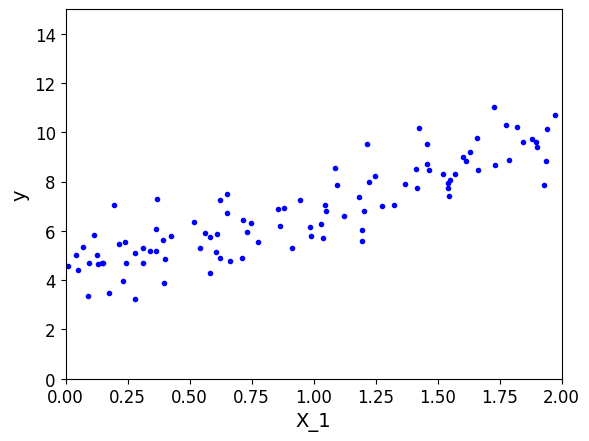

In [3]:
plt.plot(X,y,'b.') 
plt.xlabel('X_1') 
plt.ylabel('y') 
plt.axis([0,2,0,15]) 
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X] #特征矩阵x前加上一列全为1的向量，计算截距
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]]) 
X_new_b = np.c_[np.ones((2,1)),X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

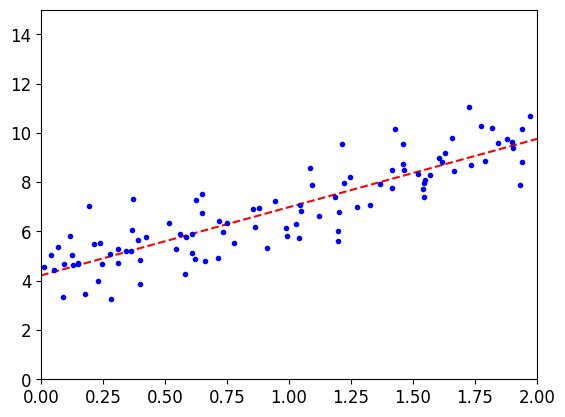

In [7]:
plt.plot(X_new,y_predict,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X,y) 
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[2.77011339]]
[4.21509616]


In [9]:
##梯度下降
##批量梯度下降
eta = 0.1 
n_iterations = 1000 
m = 100 
theta = np.random.randn(2,1) 
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y) 
    theta = theta - eta * gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [12]:
theta_path_bgd = [] 
def plot_gradient_descent(theta,eta,theta_path=None):
    m = len(X_b) 
    plt.plot(X,y,'b.') 
    n_iterations = 1000 
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta) 
        plt.plot(X_new,y_predict,'b-') 
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y) 
        theta = theta - eta * gradients 
        if theta_path is not None:
            theta_path.append(theta) 
    plt.xlabel('X_1') 
    plt.axis([0,2,0,15]) 
    plt.title('eta={}'.format(eta))

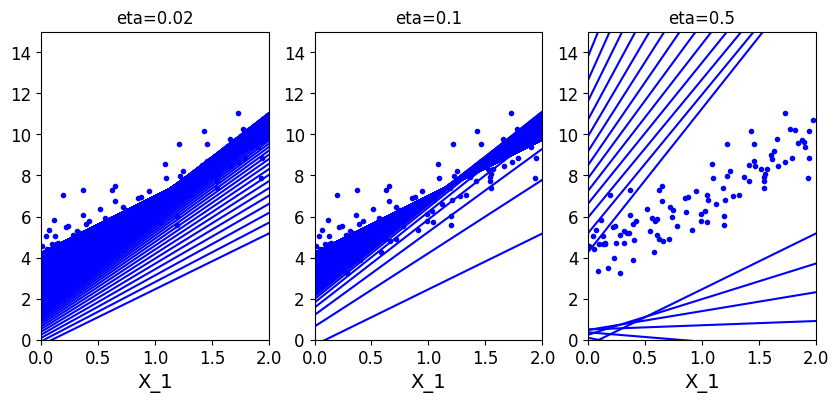

In [13]:
theta = np.random.randn(2,1) 
plt.figure(figsize=(10,4)) 
plt.subplot(131)
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()

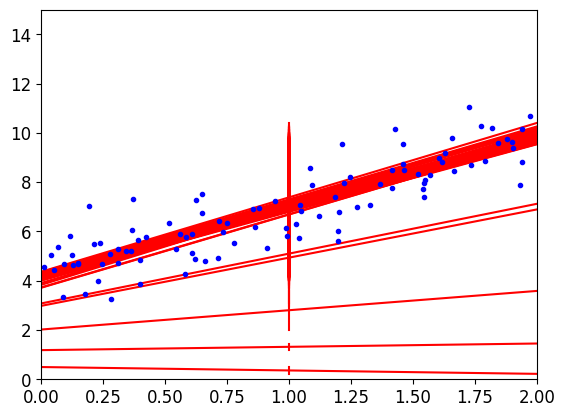

In [14]:
theta_path_sgd = [] 
m = len(X_b) 
np.random.seed(42) 
n_epochs = 50 

t0 = 5 
t1 = 50 
def learning_schedule(t):
    return t0 / (t1 + t) 

theta = np.random.randn(2,1) 
for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i < 10:
            y_predict = X_new_b.dot(theta) 
            plt.plot(X_new_b,y_predict,'r-') 
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1] 
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients 
        theta_path_sgd.append(theta) 
plt.plot(X,y,'b.') 
plt.axis([0,2,0,15]) 
plt.show()

In [17]:
#minibatch梯度下降
theta_path_mgd = [] 
n_epochs = 50 
minibatch = 16 
theta = np.random.randn(2,1) 
t0,t1 = 200,1000 
def learning_schedule(t):
    return t0 / (t + t1) 
np.random.seed(42) 
t = 0 
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m) 
    X_b_shuffled = X_b[shuffled_indices] 
    y_shuffled = y[shuffled_indices] 
    for i in range(0,m,minibatch):
        t += 1 
        xi = X_b_shuffled[i:i+minibatch] 
        yi = y_shuffled[i:i+minibatch] 
        gradients = 2/minibatch * xi.T.dot(xi.dot(theta)-yi) 
        eta = learning_schedule(t) 
        theta = theta - eta * gradients 
        theta_path_mgd.append(theta)

In [18]:
theta

array([[4.25490685],
       [2.80388784]])

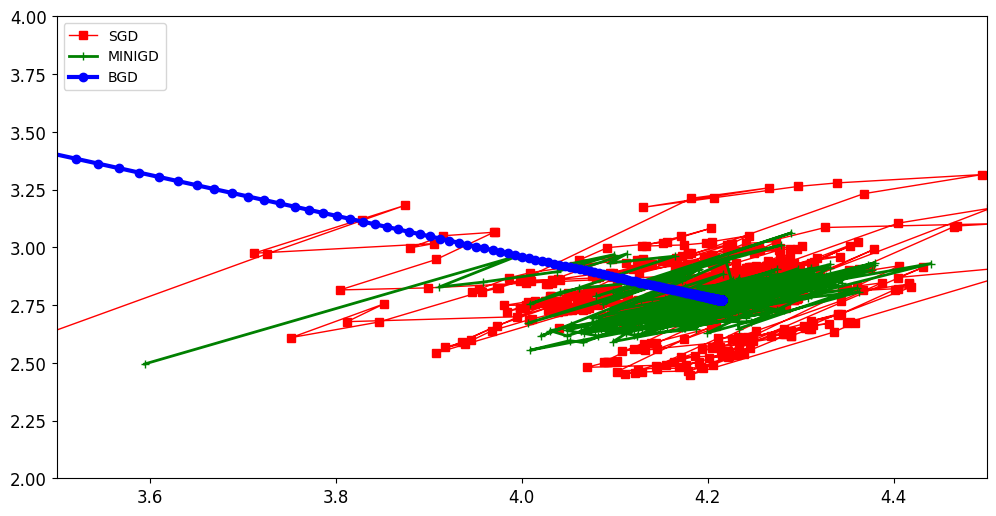

In [19]:
##三种策略对比
theta_path_bgd = np.array(theta_path_bgd) 
theta_path_sgd = np.array(theta_path_sgd) 
theta_path_mgd = np.array(theta_path_mgd) 

plt.figure(figsize=(12,6)) 
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MINIGD')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='BGD')
plt.legend(loc='upper left')
plt.axis([3.5,4.5,2.0,4.0])
plt.show()

In [20]:
#多项式回归
m = 100 
X = 6 * np.random.rand(m,1) - 3 
y = 0.5 * X ** 2 + X + np.random.randn(m,1)

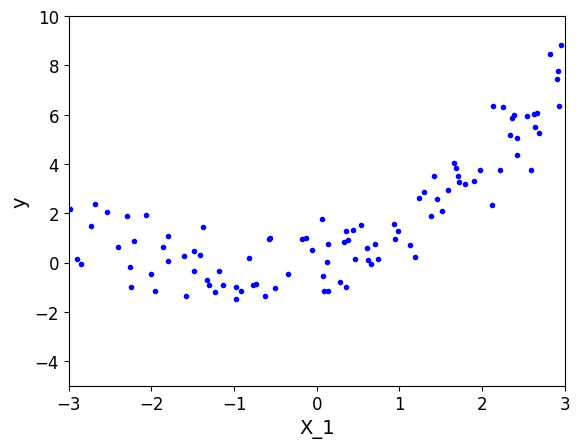

In [21]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2,include_bias=False) 
X_poly = poly_features.fit_transform(X) 
X[0]

array([2.38942838])

In [23]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X_poly,y) 
print(lin_reg.coef_) 
print(lin_reg.intercept_)

[[0.95038538 0.52577032]]
[-0.0264767]


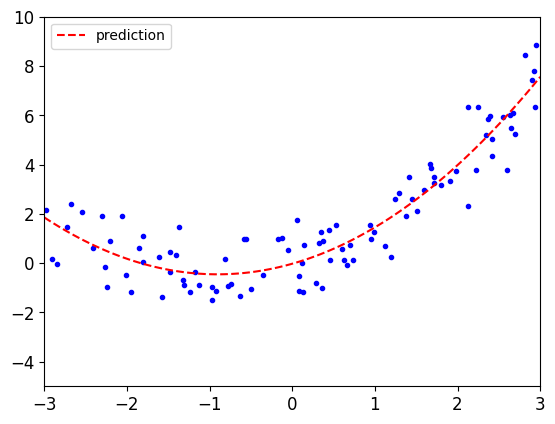

In [24]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

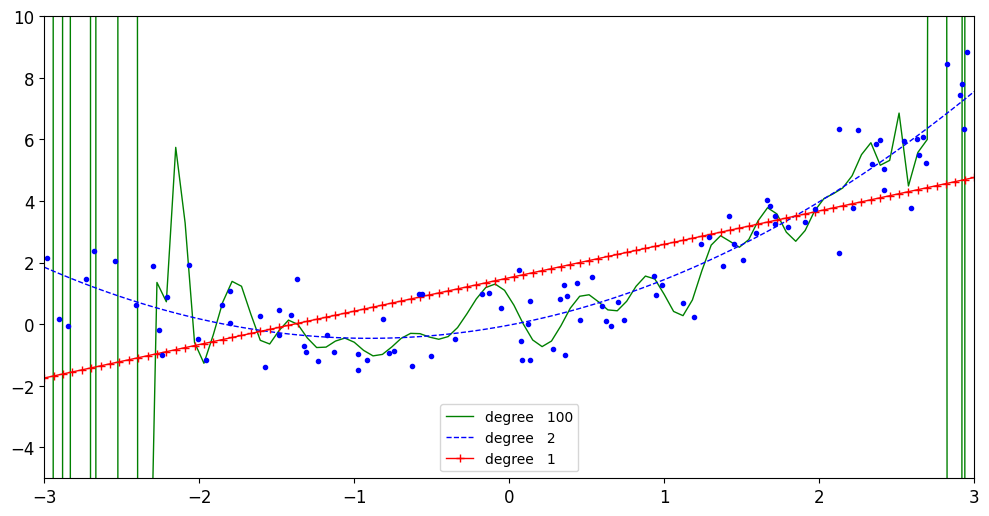

In [25]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
plt.figure(figsize=(12,6)) 
for style,width,degree in (('g-',1,100),('b--',1,2),('r-+',1,1)):
    poly_features = PolynomialFeatures(degree=degree,include_bias=False) 
    std = StandardScaler() 
    lin_reg = LinearRegression() 
    polynomial_reg = Pipeline([('poly_features',poly_features),('StandardScaler',std),('lin_reg',lin_reg)]) 
    polynomial_reg.fit(X,y) 
    y_new_2 = polynomial_reg.predict(X_new) 
    plt.plot(X_new,y_new_2,style,label = 'degree   '+str(degree),linewidth = width)
plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=100) 
    train_errors,val_errors = [],[] 
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth = 2,label = 'train_error')
    plt.plot(np.sqrt(val_errors),'b-',linewidth = 3,label = 'val_error')
    plt.xlabel('Trainsing set size')
    plt.ylabel('RMSE')
    plt.legend()

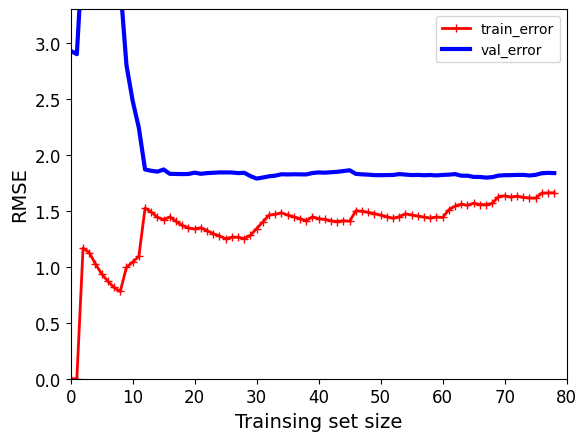

In [27]:
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg,X,y) 
plt.axis([0,80,0,3.3]) 
plt.show()

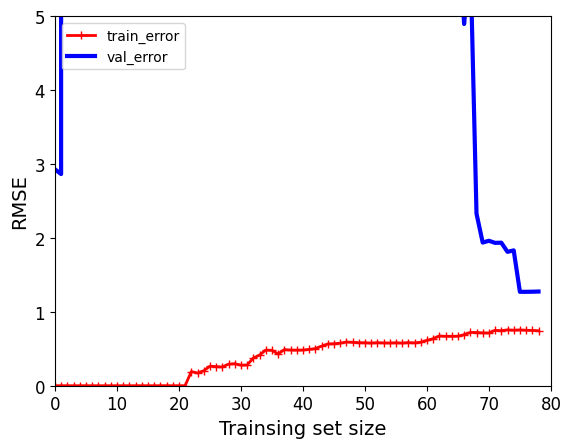

In [28]:
polynomial_reg = Pipeline([('poly_features',PolynomialFeatures(degree=25,include_bias=False)),('lin_reg',LinearRegression())]) 
plot_learning_curves(polynomial_reg,X,y) 
plt.axis([0,80,0,5]) 
plt.show()

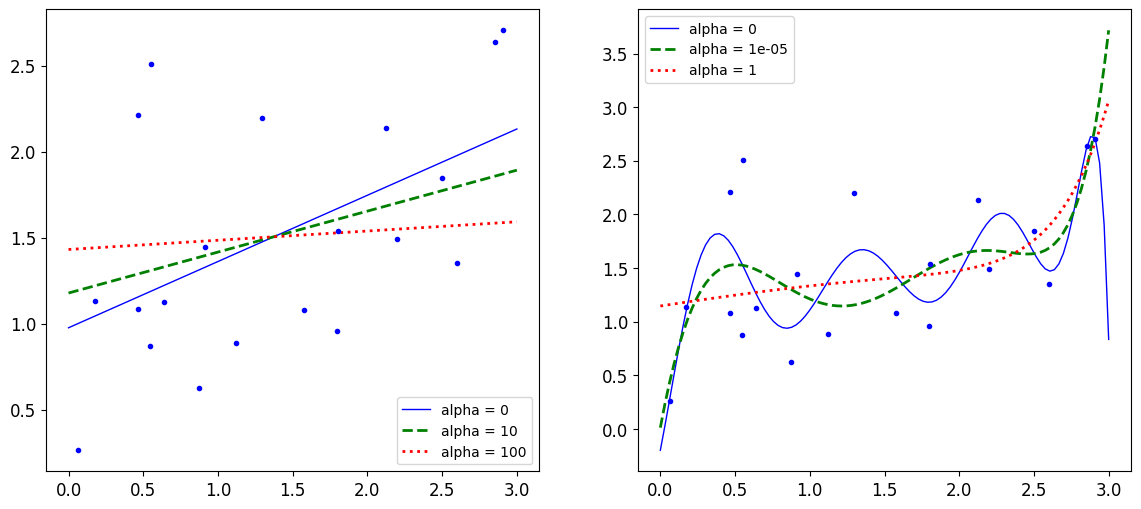

In [29]:
##正则化  对权重参数进行惩罚，权重参数尽可能平滑一些
from sklearn.linear_model import Ridge 
np.random.seed(42) 
m = 20 
X = 3 * np.random.rand(m,1) 
y = 0.5 * X + np.random.randn(m,1) / 1.5 + 1 
X_new = np.linspace(0,3,100).reshape(100,1) 
def plot_model(model_calss,polynomial,alphas,**model_kargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_calss(alpha,**model_kargs) 
        if polynomial:
            model = Pipeline([('poly_features',PolynomialFeatures(degree=10,include_bias=False)),('StandardScaler',StandardScaler()),('lin_reg',model)]) 
        model.fit(X,y) 
        y_new_regul = model.predict(X_new) 
        lw = 2 if alpha > 0 else 1 
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label='alpha = {}'.format(alpha)) 
    plt.plot(X,y,'b.',linewidth=3) 
    plt.legend() 
plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas = (0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas = (0,10**-5,1))
plt.show()

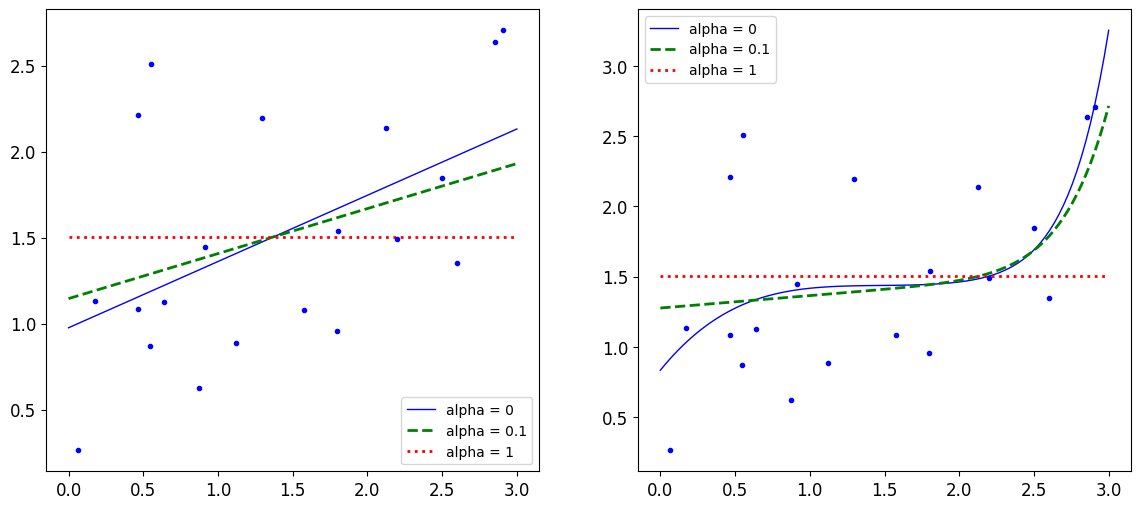

In [30]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas = (0,0.1,1))
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas = (0,10**-1,1))
plt.show()